# 1. Rappresentazione dei dati per l'analisi

## 1.1 Preparazione del notebook

Premere il tasto *play* della cella seguente per installare alcune librerie necessarie alla visualizzazione delle mappe. Terminata l'installazione, riavviare il runtime (dalla barra degli strumenti *Runtime* -> *Riavvia runtime*) e proseguire con le celle successive.

In [ ]:
! apt-get install libgeos-3.5.0
! apt-get install libgeos-dev
! pip install https://github.com/matplotlib/basemap/archive/master.zip

Premere il tasto *play* della cella seguente per importare i dataset dalla repository di GitHub.

In [ ]:
! git clone https://github.com/vitoreno/StelleDataset.git
! unzip /content/StelleDataset/data.zip

Premere il tasto *play* della cella seguente per importare le librerie necessarie all'esecuzione del notebook.

In [2]:
%load_ext google.colab.data_table
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import sys
from datetime import datetime
import scipy.stats

## 1.2 Lettura dei dataset

Premere il tasto play delle celle seguenti per accedere ai dataset importati e visualizzare una descrizione degli stessi.

Il dataset *mediterranean_surface_temperature_2014_15_16* descrive la temperatura della superficie del mar Adriatico, Ionio e Tirreno dal 2014 al 2016. Per ogni osservazione sono note:
*   *time*: data dell'osservazione;
*   *sea*: indica se l'osservazione è avvenuta nel mar Adriatico, Ionio o Tirreno;
*   *lat, lon*: coordinate (latitudine, longitudine) del punto in cui è stata registrata la temperatura;
*   *sst*: temperatura della superficie del mare (Sea Surface Temperature).



In [3]:
data = pd.read_csv("/content/mediterranean_surface_temperature_2014_15_16.csv")
data.describe()

,lat,lon,sst
count,964480.000000,964480.000000,964480.000000
mean,40.162784,15.190625,292.957242
std,2.195440,3.328835,4.470843
min,36.625000,8.875000,281.549994
25%,38.375000,12.375000,288.909994
50%,39.875000,15.125000,292.269993
75%,41.875000,17.875000,297.109993
max,45.625000,23.125000,303.719993


Il dataset *soil_moisture_2016* descrive l'umidità del suolo sulle coste di mar Adriatico, Ionio, Tirreno, Rosso e del Labrador nell'anno 2016, e la temperatura della superficie del mare registrata nel punto più vicino. Per ogni osservazione sono note:
*   *time*: data dell'osservazione;
*   *sea*: indica se l'osservazione è avvenuta nel mar Adriatico, Ionio, Tirreno, Rosso o del Labrador;
*   *lat_sm, lon_sm*: coordinate (latitudine, longitudine) del punto in cui è stata registrata l'albedo;
*   *sm*: umidità del suolo (Soil Moisture).
*   *lat, lon*: coordinate (latitudine, longitudine) del punto in cui è stata registrata la temperatura;
*   *sst*: temperatura della superficie del mare (Sea Surface Temperature).


In [4]:
data = pd.read_csv("/content/soil_moisture_2016.csv")
data.describe()

,lat,lon,sst,lat_sm,lon_sm,sm
count,181507.000000,181507.000000,181507.000000,181507.000000,181507.000000,181507.000000
mean,32.049075,22.341707,296.031546,32.022808,22.332206,0.211186
std,12.011801,21.530728,6.985075,11.982348,21.657081,0.095916
min,12.625000,-58.625000,271.559994,12.625000,-64.125000,0.020000
25%,19.125000,14.625000,290.319994,19.125000,14.625000,0.120104
50%,38.125000,20.375000,297.709993,37.875000,20.625000,0.210748
75%,42.125000,39.125000,301.779993,42.125000,39.125000,0.294576
max,59.875000,43.375000,306.389993,57.875000,43.375000,0.464250


## 1.3 Visualizzazione delle mappe

L'esecuzione della prossima cella permette di visualizzare una mappa geografica del Mediterraneo con le relative temperature registrate nella data selezionata.
Selezionare una data compresa fra il 2014-01-01 e il 2016-12-31, e premere *play*.

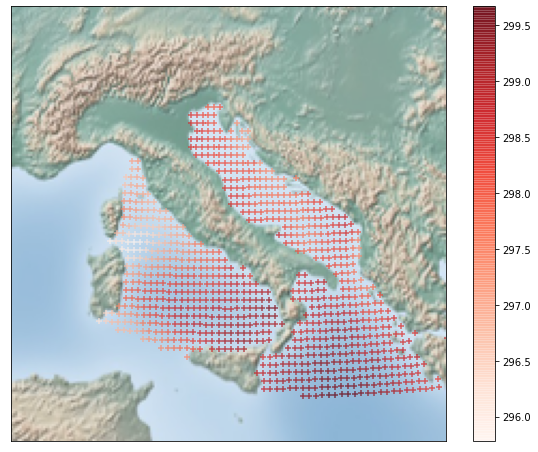

In [5]:
date_str = '2014-01-01' #@param {type:"date"}

current_date = datetime.strptime(date_str + " 12:00:00", '%Y-%m-%d %H:%M:%S')

if (current_date < datetime.strptime("2014-01-01 12:00:00", '%Y-%m-%d %H:%M:%S')) | (current_date > datetime.strptime("2016-12-31 12:00:00", '%Y-%m-%d %H:%M:%S')):
  sys.exit("Data non valida. Inserire data compresa fra 2014-01-01 e 2016-12-31")

data = pd.read_csv("/content/mediterranean_surface_temperature_2014_15_16.csv")
data.time = pd.to_datetime(data.time)

current_data = data.loc[data.time == current_date]
lat = current_data.lat.to_numpy()
lon = current_data.lon.to_numpy()
sst = current_data.sst.to_numpy()

fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=1.5E6, height=1.5E6, 
            lat_0=42, lon_0=14)
m.shadedrelief(scale=0.5)
m.scatter(lon, lat, latlon=True, c=sst,
          cmap='Reds', marker ='+', edgecolors='none', alpha=0.7)
plt.colorbar()

L'esecuzione della prossima cella permette di visualizzare le mappe geografiche di Mediterraneo, mar Rosso e mar del Labrador con relativi temperature e valori di umidità del suolo, registrati nella data selezionata.
Selezionare una data compresa fra il 2016-01-01 e il 2016-12-31, e premere *play* (i dati sul mar del Labrador non sono disponibili per tutte le date).

Text(0.5, 1.0, 'Labrador Sea')

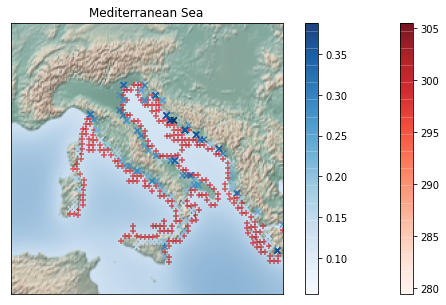

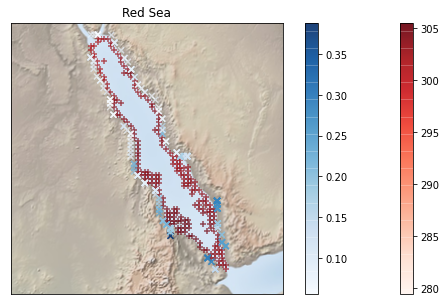

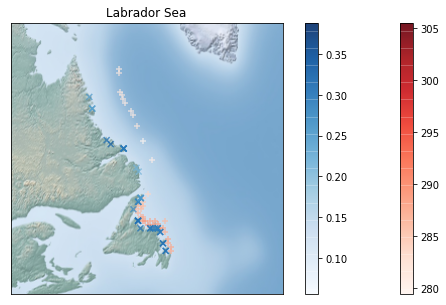

In [6]:
date_str = '2016-08-01' #@param {type:"date"}

current_date = datetime.strptime(date_str + " 12:00:00", '%Y-%m-%d %H:%M:%S')

if (current_date < datetime.strptime("2016-01-01 12:00:00", '%Y-%m-%d %H:%M:%S')) | (current_date > datetime.strptime("2016-12-31 12:00:00", '%Y-%m-%d %H:%M:%S')):
  sys.exit("Data non valida. Inserire data compresa fra 2016-01-01 e 2016-12-31")

data = pd.read_csv("/content/soil_moisture_2016.csv")
data.time = pd.to_datetime(data.time)

current_data = data.loc[data.time == current_date]
lat_sst = current_data.lat.to_numpy()
lon_sst = current_data.lon.to_numpy()
sst = current_data.sst.to_numpy()
lat_sm = current_data.lat_sm.to_numpy()
lon_sm = current_data.lon_sm.to_numpy()
sm = current_data.sm.to_numpy()

# Mediterranean
fig = plt.figure(figsize=(10, 5))
m = Basemap(projection='lcc', resolution='c',
            width=1.5E6, height=1.5E6, 
            lat_0=42, lon_0=14)
m.shadedrelief(scale=0.5)
m.scatter(lon_sst, lat_sst, latlon=True, c=sst,
          cmap='Reds', marker ='+', edgecolors='none', alpha=0.7)
plt.colorbar()
m.scatter(lon_sm, lat_sm, latlon=True, c=sm,
          cmap='Blues', marker ='x', edgecolors='none', alpha=0.7)
plt.colorbar()
plt.title("Mediterranean Sea")

# Red
fig = plt.figure(figsize=(10, 5))
m = Basemap(projection='lcc', resolution='c',
            width=2E6, height=2E6, 
            lat_0=20, lon_0=38)
m.shadedrelief(scale=0.5)
m.scatter(lon_sst, lat_sst, latlon=True, c=sst,
          cmap='Reds', marker ='+', edgecolors='none', alpha=0.7)
plt.colorbar()
m.scatter(lon_sm, lat_sm, latlon=True, c=sm,
          cmap='Blues', marker ='x', edgecolors='none', alpha=0.7)
plt.colorbar()
plt.title("Red Sea")

# Labrador
fig = plt.figure(figsize=(10, 5))
m = Basemap(projection='lcc', resolution='c',
            width=2E6, height=2E6, 
            lat_0=54, lon_0=-55)
m.shadedrelief(scale=0.5)
m.scatter(lon_sst, lat_sst, latlon=True, c=sst,
          cmap='Reds', marker ='+', edgecolors='none', alpha=0.7)
plt.colorbar()
m.scatter(lon_sm, lat_sm, latlon=True, c=sm,
          cmap='Blues', marker ='x', edgecolors='none', alpha=0.7)
plt.colorbar()
plt.title("Labrador Sea")

## 1.4 Diagramma a torta

Premere il tasto *play* della cella seguente per visualizzare l'appartenenza delle osservazioni di *mediterranean_surface_temperature_2014_15_16* alle regioni di mar Adriatico, Ionio e Tirreno, tramite un diagramma a torta.

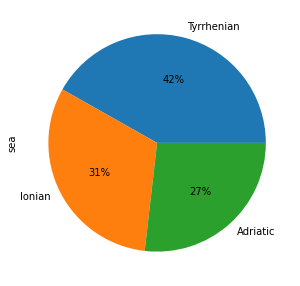

In [7]:
data = pd.read_csv("/content/mediterranean_surface_temperature_2014_15_16.csv")
data.sea.value_counts().plot.pie(autopct='%1.0f%%', figsize=(5,5))

## 1.5 Istogramma

Tramite l'esecuzione della prossima cella è 
possibile visualizzare l'andamento della temperatura media di mar Adriatico, Ionio e Tirreno, durante l'anno seleazionato. In alternativa è possibile visualizzare la mediana.

Selezionare modalità (media o mediana) e anno di interesse, e premere il tasto *play*.

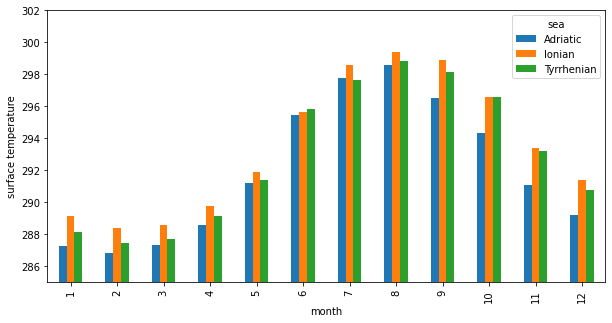

In [8]:
modality = "mean" #@param ["mean", "median"]
year = 2014 #@param [2014,2015,2016]

data = pd.read_csv("/content/mediterranean_surface_temperature_2014_15_16.csv")
data.time = pd.to_datetime(data.time)

current_data = data.loc[data.time.dt.year == year]

if modality == "mean":
  sst_mean = current_data.groupby([pd.DatetimeIndex(current_data.time).month, current_data.sea]).mean()
  sst_mean.unstack().plot.bar(y='sst', xlabel='month', ylabel='surface temperature', ylim=[285,302], figsize=(10,5))
elif modality == "median":
  sst_median = current_data.groupby([pd.DatetimeIndex(current_data.time).month, current_data.sea]).median()
  sst_median.unstack().plot.bar(y='sst', xlabel='month', ylabel='surface temperature', ylim=[285,302], figsize=(10,5))

## 1.6 Boxplot

Premere il tasto *play* della seguente cella per visualizzare la distribuzione di latitudine e longitudine nelle osservazioni relative a mar Adriatico, Ionio e Tirreno, tramite boxplot.

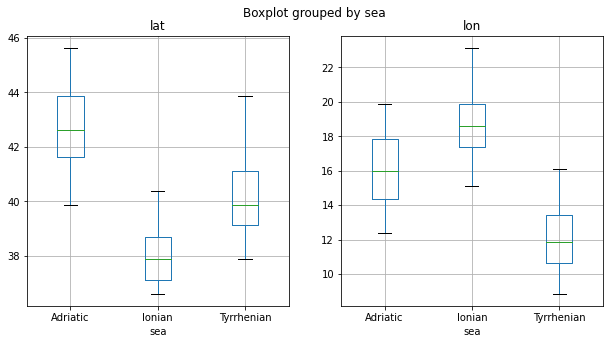

In [9]:
data = pd.read_csv("/content/mediterranean_surface_temperature_2014_15_16.csv")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
data.boxplot(column='lat', by='sea', ax=axes[0])
data.boxplot(column='lon', by='sea', ax=axes[1])

Tramite l'esecuzione della prossima cella è possibile visualizzare la distribuzione della temperatura nelle osservazioni relative a mar Adriatico, Ionio e Tirreno nell'anno e mese selezionati, tramite boxplot.
Selezionare anno e mese d'interesse, e premere il tasto *play*.

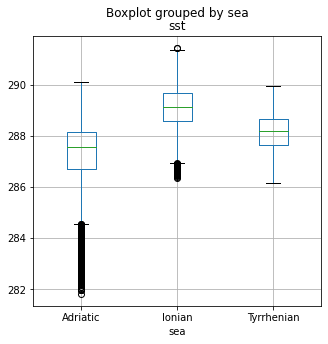

In [10]:
month = 1 #@param [1,2,3,4,5,6,7,8,9,10,11,12]
year = 2014 #@param [2014,2015,2016]

data = pd.read_csv("/content/mediterranean_surface_temperature_2014_15_16.csv")
data.time = pd.to_datetime(data.time)

current_data = data.loc[((data.time.dt.year == year) & (data.time.dt.month == month))]

current_data.boxplot(column='sst', by='sea', figsize=(5,5))

## 1.7 Correlazione

L'esecuzione della cella seguente permette di calcolare la correlazione fra i valori di umidità del suolo sulla costa e le temperature della superficie del mare registrate nei punti più vicini, osservati nella data selezionata. Vengono inoltre descritte le distribuzioni di temperatura e umidità tramite istogrammi. 
Selezionare una data compresa fra 2016-01-01 e 2016-12-31, e premere *play*.

Coefficiente di correlazione:  -0.6410523093993317
P-value:  7.226587403004511e-56


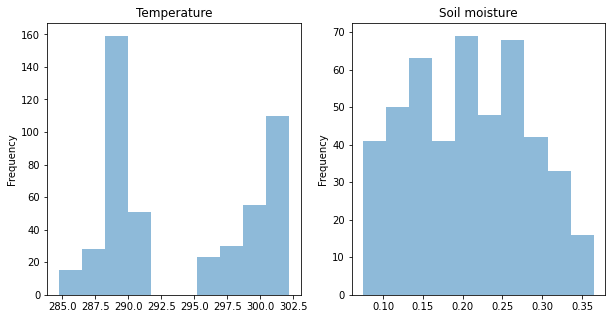

In [11]:
date_str = '2016-01-01' #@param {type:"date"}

current_date = datetime.strptime(date_str + " 12:00:00", '%Y-%m-%d %H:%M:%S')

if (current_date < datetime.strptime("2016-01-01 12:00:00", '%Y-%m-%d %H:%M:%S')) | (current_date > datetime.strptime("2016-12-31 12:00:00", '%Y-%m-%d %H:%M:%S')):
  sys.exit("Data non valida. Inserire data compresa fra 2016-01-01 e 2016-12-31")

data = pd.read_csv("/content/soil_moisture_2016.csv")
data.time = pd.to_datetime(data.time)

current_data = data.loc[data.time == current_date]

x = current_data.sst.to_numpy()
y = current_data.sm.to_numpy()

r, p = scipy.stats.pearsonr(x, y)

print("Coefficiente di correlazione: ",r)
print("P-value: ",p)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].set_title('Temperature')
current_data.sst.plot.hist(alpha=0.5, ax=axes[0])
axes[1].set_title('Soil moisture')
current_data.sm.plot.hist(alpha=0.5, ax=axes[1])